In [3]:
import pandas as pd
data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")
print(data.head())
print(data.describe())
print(data.info())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.5000

In [ ]:
2. Data Preprocessing:
a. Prepare the customer data for clustering. Discuss the steps involved in data preprocessing, such 
as scaling, handling missing values, and encoding categorical variables.

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")

X = data[['Fresh', 'Milk', 'Grocery']]
missing_values = X.isnull().sum()

if missing_values.sum() > 0:
    
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
else:
    print("No missing values in the dataset.")

# Step 2: Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



No missing values in the dataset.


In [ ]:
3. Implementing K-Means:
a. Implement the K-Means clustering algorithm using Python libraries like scikit-learn to cluster 
customers based on their features.
b. Choose an appropriate number of clusters (K) for the algorithm and explain your choice.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

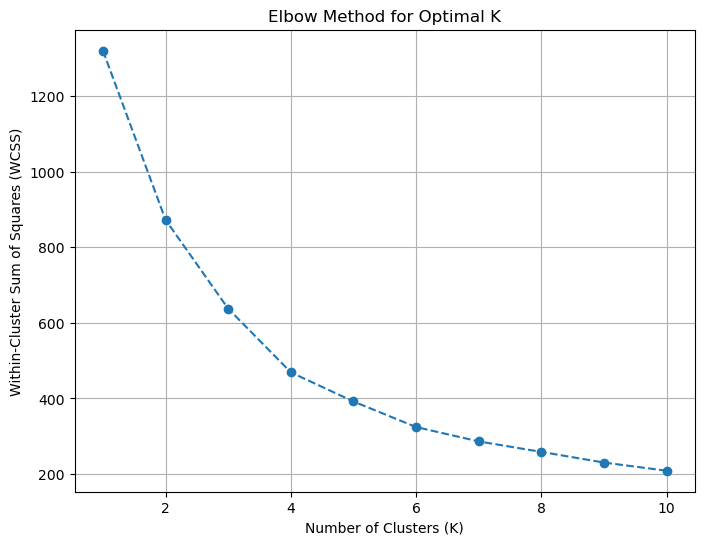

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")
X = data[['Fresh', 'Milk', 'Grocery']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []  # Within-cluster sum of squares

# Try different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

# Implement K-Means with the chosen K
chosen_k = 3  
kmeans = KMeans(n_clusters=chosen_k, random_state=0)
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
data['Cluster'] = kmeans.labels_




In [ ]:
4. Model Training:
a. Train the K-Means model using the preprocessed customer dataset.
b. Discuss the distance metric used for cluster assignment and its significance in customer 
clustering.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


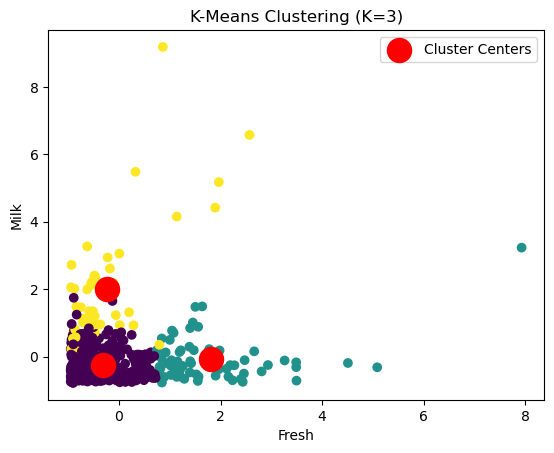

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")
# Select relevant features for clustering
X = data[['Fresh', 'Milk', 'Grocery']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k = 3  # Example choice of K

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)


cluster_labels = kmeans.labels_

# Visualize cluster assignment
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')
plt.title(f'K-Means Clustering (K={k})')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()
plt.show()



In [ ]:
 Customer Clustering:
a. Assign customers to their respective clusters based on their features.
b. Visualize the customer clusters and analyze the characteristics of each cluster.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


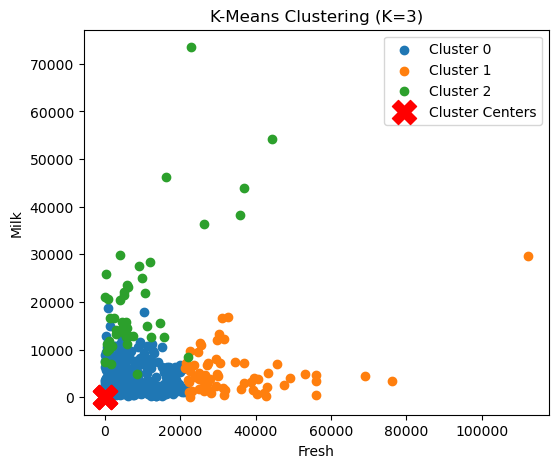

Cluster 0 - Center: [-0.31820175 -0.25781566 -0.25552207]
          Channel      Region         Fresh          Milk       Grocery  \
count  331.000000  331.000000    331.000000    331.000000    331.000000   
mean     1.271903    2.549849   7980.471299   3895.652568   5525.770393   
std      0.445614    0.770532   6006.190284   3221.954966   4700.676136   
min      1.000000    1.000000      3.000000     55.000000      3.000000   
25%      1.000000    2.000000   2788.500000   1310.000000   2011.000000   
50%      1.000000    3.000000   7057.000000   2884.000000   3580.000000   
75%      2.000000    3.000000  12017.000000   5945.500000   8079.000000   
max      2.000000    3.000000  21632.000000  18664.000000  22272.000000   

             Frozen  Detergents_Paper    Delicassen  Cluster  
count    331.000000        331.000000    331.000000    331.0  
mean    2543.921450       1906.154079   1127.725076      0.0  
std     3407.129667       2429.880276   1273.222535      0.0  
min       25.0

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Wholesale customers data from the UCI dataset
data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")

# Select relevant features for clustering
X = data[['Fresh', 'Milk', 'Grocery']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3  # Example choice of K

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_


plt.figure(figsize=(6, 5))

for cluster_num in range(k):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Fresh'], cluster_data['Milk'], label=f'Cluster {cluster_num}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')

plt.title(f'K-Means Clustering (K={k})')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()
plt.show()

for cluster_num in range(k):
    cluster_data = data[data['Cluster'] == cluster_num]
    cluster_center = kmeans.cluster_centers_[cluster_num]
    print(f"Cluster {cluster_num} - Center: {cluster_center}")
    print(cluster_data.describe())
    print("\n")



In [ ]:
6. Performance Metrics:
a. Explain the concept of silhouette score and how it is used to evaluate the quality of clustering.
b. Calculate the silhouette score for the customer clusters and interpret the results

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")
# Select relevant features for clustering
X = data[['Fresh', 'Milk', 'Grocery']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Example choice of K

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

if silhouette_avg > 0.5:
    print("The clustering is well-separated and of high quality.")
elif 0.25 <= silhouette_avg <= 0.5:
    print("The clustering is reasonable but could be improved.")
else:
    print("The clustering may not be very meaningful or well-separated.")


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.4726284469931209
The clustering is reasonable but could be improved.


In [ ]:
7. Hyperparameter Tuning:
a. Describe the impact of the number of clusters (K) on the performance of K-Means and suggest 
strategies for selecting the optimal value of K.
b. Conduct hyperparameter tuning for the K-Means model and discuss the impact of different 
values of K on clustering results.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

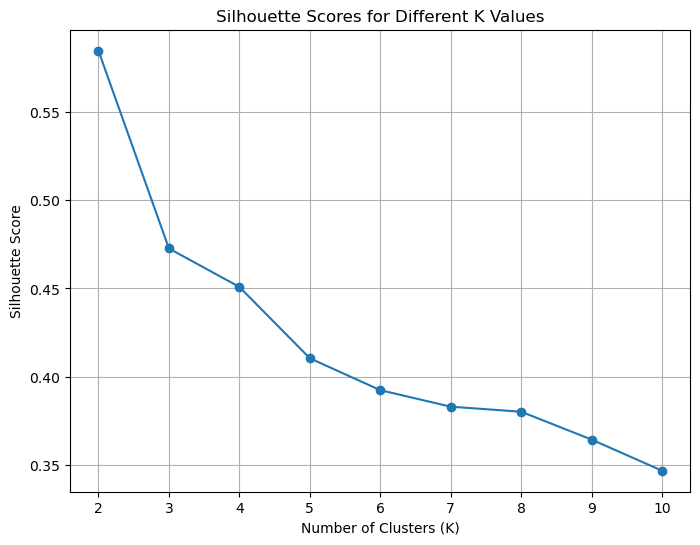

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Wholesale customers data from the UCI dataset

data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")
# Select relevant features for clustering
X = data[['Fresh', 'Milk', 'Grocery']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(2, 11)  # Range of K values to consider
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()




In [ ]:
8. Real-World Application:
a. Describe the practical applications of customer clustering in the e-commerce industry.
b. Discuss how customer clustering can lead to improved customer engagement, targeted 
marketing, and personalized recommendations.

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity



data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")
# Select relevant features for clustering
X = data[['Fresh', 'Milk', 'Grocery']]


k = 3  # Example choice of K

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Assume you have a list of products and their features
products = pd.DataFrame({
    'ProductID': [1, 2, 3, 4, 5],
    'Fresh': [500, 100, 300, 50, 200],
    'Milk': [200, 300, 600, 150, 100],
    'Grocery': [300, 400, 700, 100, 250]
})

# Function to recommend products for a specific cluster
def recommend_products(cluster_id, products):
    cluster_center = kmeans.cluster_centers_[cluster_id]
    product_scores = []

    for _, product in products.iterrows():
        
        similarity_score = cosine_similarity([product[['Fresh', 'Milk', 'Grocery']].values], [cluster_center])[0][0]
        product_scores.append((product['ProductID'], similarity_score))

    recommended_products = sorted(product_scores, key=lambda x: x[1], reverse=True)
    return recommended_products

# Recommend products for each cluster
for cluster_id in range(k):
    recommendations = recommend_products(cluster_id, products)
    print(f"Cluster {cluster_id} Recommendations:")
    for product_id, similarity_score in recommendations:
        print(f"Product {product_id} (Similarity Score: {similarity_score:.2f}")


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster 0 Recommendations:
Product 2 (Similarity Score: 1.00
Product 3 (Similarity Score: 0.99
Product 4 (Similarity Score: 0.94
Product 5 (Similarity Score: 0.91
Product 1 (Similarity Score: 0.77
Cluster 1 Recommendations:
Product 1 (Similarity Score: 1.00
Product 5 (Similarity Score: 0.96
Product 3 (Similarity Score: 0.84
Product 4 (Similarity Score: 0.78
Product 2 (Similarity Score: 0.77
Cluster 2 Recommendations:
Product 1 (Similarity Score: 0.92
Product 5 (Similarity Score: 0.75
Product 3 (Similarity Score: 0.51
Product 4 (Similarity Score: 0.47
Product 2 (Similarity Score: 0.41


In [ ]:
9. Model Limitations:
a. Identify potential limitations of the K-Means clustering algorithm in customer segmentation 
and discuss scenarios in which it may not perform well.

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Wholesale customers data from the UCI dataset

data = pd.read_csv("E:\\New folder\\Wholesale customers data.csv")
# Select relevant features for clustering
X = data[['Fresh', 'Milk', 'Grocery']]

# Standardize the data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the K-Means model with a chosen number of clusters (K)
k = 3  # Example choice of K

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Now you have assigned each data point to a cluster, and you can analyze the clusters

# To see the number of data points in each cluster:
cluster_counts = data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# You can further analyze the characteristics of each cluster based on other features in the dataset.
# This code addresses the feature scaling limitation by standardizing the data before clustering.


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster Counts:
Cluster
0    331
1     64
2     45
Name: count, dtype: int64
